In [2]:
#You will need to install tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
tf.config.set_visible_devices([],'GPU')

In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
data = pd.read_csv("BankLoanApproval.csv")

In [5]:
# Dropping Loan_ID column 
data.drop(['LoanID'],axis=1,inplace=True)

In [6]:
# Import label encoder 
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])

In [7]:
# To find the number of columns with  
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [8]:
X = data.drop(['Default'],axis=1) 
Y = data['Default'] 
X.shape,Y.shape 

((255327, 16), (255327,))

In [9]:
# Address Data Imbalanced with 

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# Display class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
 
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution before SMOTE: Counter({0: 180629, 1: 23632})
Class distribution after SMOTE: Counter({0: 180629, 1: 180629})


In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Display class distribution before SMOTE for testing data
print("Class distribution before SMOTE (testing data):", Counter(y_test))

# Apply SMOTE to oversample the minority class for testing data
smote_test = SMOTE(sampling_strategy='auto', random_state=42)
X_test_resampled, y_test_resampled = smote_test.fit_resample(X_test, y_test)

# Display class distribution after SMOTE for testing data
print("Class distribution after SMOTE (testing data):", Counter(y_test_resampled))

Class distribution before SMOTE (testing data): Counter({0: 45050, 1: 6016})
Class distribution after SMOTE (testing data): Counter({0: 45050, 1: 45050})


In [11]:
X_train = X_train_resampled
y_train = y_train_resampled
X_test = X_test_resampled
y_test = y_test_resampled

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((361258, 16), (90100, 16), (361258,), (90100,))

In [12]:
# create sample for testing purpose
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train_resampled, y_train_resampled, train_size=0.01, random_state=42)

# Check the shape of the sample data and the original sets
print("Shape of X_train_sample:", X_train_sample.shape)
print("Shape of y_train_sample:", y_train_sample.shape)

Shape of X_train_sample: (3612, 16)
Shape of y_train_sample: (3612,)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
import time

start_time = time.time()

# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to class labels using a threshold
threshold = 0.5  # You can adjust this threshold as needed
y_pred = (y_pred_prob > threshold).astype(int)

# Print evaluation metrics
print("\nNeural Network Evaluation:\n") 
print(classification_report(y_test, y_pred))
print("\nNeural Network Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)

end_time = time.time()
training_time = end_time - start_time
print(f"\nTraining time: {training_time} seconds")


Epoch 1/10


c:\Users\cheng\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9032/9032 ━━━━━━━━━━━━━━━━━━━━ 7s 685us/step - accuracy: 0.7930 - loss: 0.4475 - val_accuracy: 0.7972 - val_loss: 0.4177
Epoch 2/10
9032/9032 ━━━━━━━━━━━━━━━━━━━━ 6s 653us/step - accuracy: 0.8134 - loss: 0.4170 - val_accuracy: 0.7965 - val_loss: 0.4249
Epoch 3/10
9032/9032 ━━━━━━━━━━━━━━━━━━━━ 6s 674us/step - accuracy: 0.8145 - loss: 0.4149 - val_accuracy: 0.8026 - val_loss: 0.4117
Epoch 4/10
9032/9032 ━━━━━━━━━━━━━━━━━━━━ 6s 694us/step - accuracy: 0.8171 - loss: 0.4121 - val_accuracy: 0.8047 - val_loss: 0.4079
Epoch 5/10
9032/9032 ━━━━━━━━━━━━━━━━━━━━ 6s 680us/step - accuracy: 0.8165 - loss: 0.4110 - val_accuracy: 0.8215 - val_loss: 0.3821
Epoch 6/10
9032/9032 ━━━━━━━━━━━━━━━━━━━━ 6s 662us/step - accuracy: 0.8169 - loss: 0.4100 - val_accuracy: 0.8144 - val_loss: 0.3888
Epoch 7/10
9032/9032 ━━━━━━━━━━━━━━━━━━━━ 6s 659us/step - accuracy: 0.8184 - loss: 0.4087 - val_accuracy: 0.8051 - val_loss: 0.4074
Epoch 8/10
9032/9032 ━━━━━━━━━━━━━━━━━━━━ 6s 682us/step - accuracy: 0.8184 - loss: 0.40

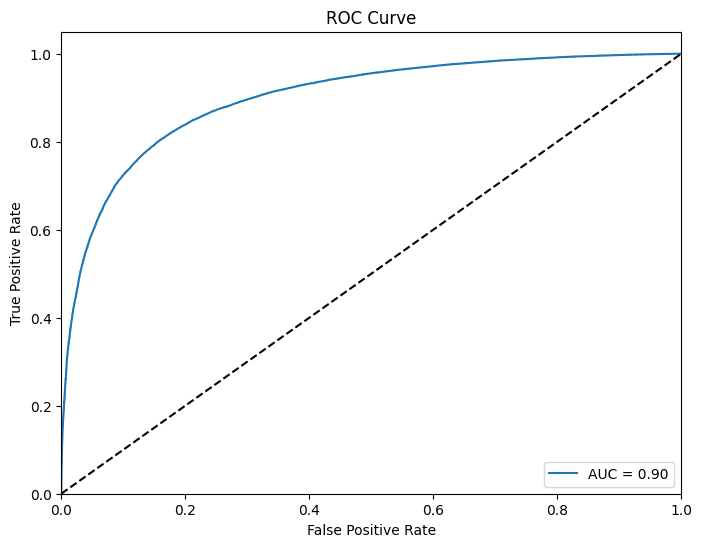

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [17]:
##deployment
df_new = pd.read_csv("NewApplicants.csv")
df_new.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,A01,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,NaN
1,A02,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,NaN
2,A03,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,NaN
3,A04,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,NaN
4,A05,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,NaN


In [18]:
# Dropping LoanID column 
df_new.drop(['LoanID'],axis=1,inplace=True)

# Dropping Default column 
df_new.drop(['Default'],axis=1,inplace=True)

In [19]:
label_encoder = preprocessing.LabelEncoder() 
obj = (df_new.dtypes == 'object') 
for col in list(obj[obj].index): 
  df_new[col] = label_encoder.fit_transform(df_new[col])

In [20]:
predictions = {}
y_pred = model.predict(df_new)
predictions['Neural Network'] = y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
